In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
Power_Generation=pd.read_csv("Power_Generation_Dataset.csv")

In [20]:
Power_Generation.head()

,ROWID,Country,State LGD Code,State,Actual energy generated,Category of Plant,Type of fuel used,Installed Capacity,Generation Programme is prepared by CEA,Region,Region ID,Sector of power plant,Name of coal company,Station Name,SourceMonth,SourceYear,YearCode,Year,MonthCode,Month
0,1,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,WPCL,AKALTARA TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
1,2,India,2,Himachal Pradesh,0.0,HYDRO,HYDRO,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,ADHPL,ALLAIN DUHANGAN HPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
2,3,India,27,Maharashtra,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,IBPL,AMARAVATI TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
3,4,India,9,Uttar Pradesh,0.0,THERMAL,COAL,0.0,0.0,NORTHERN,REG1,PRIVATE IPP,LAPPL,ANPARA C TPS,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"
4,5,India,22,Chhattisgarh,0.0,THERMAL,COAL,0.0,0.0,WESTERN,REG2,PRIVATE IPP,KWPCL,AVANTHA BHANDAR,Apr - 2008,2008,2008,"Calendar Year (Jan - Dec), 2008",200804,"April, 2008"


In [22]:
map_df = gpd.read_file("india-polygon.shp") 
map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


What is the current Installed Capacity by type per state? 

In [25]:
states_capacity_by_type={}

for index,row in Power_Generation.iterrows():
    state=row['State']
    capacity_type=row['Category of Plant']
    capacity_value=row['Installed Capacity']
    # Initialize the dictionary for the state if not already present
    if state not in states_capacity_by_type:
        states_capacity_by_type[state] = {}

    # Initialize the dictionary for the capacity type if not already present
    if capacity_type not in states_capacity_by_type[state]:
        states_capacity_by_type[state][capacity_type] = 0
    states_capacity_by_type[state][capacity_type] += capacity_value


In [27]:
aggregated_data = []
for state, capacities in states_capacity_by_type.items():
    for capacity_type, value in capacities.items():
        aggregated_data.append([state, capacity_type, value])

aggregated_df = pd.DataFrame(aggregated_data, columns=['State', 'Type', 'Capacity'])

# Pivot the DataFrame to have one row per state with capacity types as columns
aggregated_pivot_df = aggregated_df.pivot_table(index='State', columns='Type', values='Capacity').reset_index().fillna(0)

In [55]:
map_df = map_df.rename(columns={'st_nm': 'State'})

# Merge the aggregated data with the GeoDataFrame
merged_df = map_df.merge(aggregated_pivot_df, on='State', how='left')

merged_df = merged_df.fillna(0)
# Display the merged GeoDataFrame
merged_df.head()


,id,State,geometry,HYDRO,NUCLEAR,THERMAL
0,0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",0.0,0.0,0.00
1,0,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",755.0,0.0,0.00
2,0,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",10700.0,0.0,71176.55
3,0,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",0.0,0.0,341300.00
4,0,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",0.0,0.0,0.00


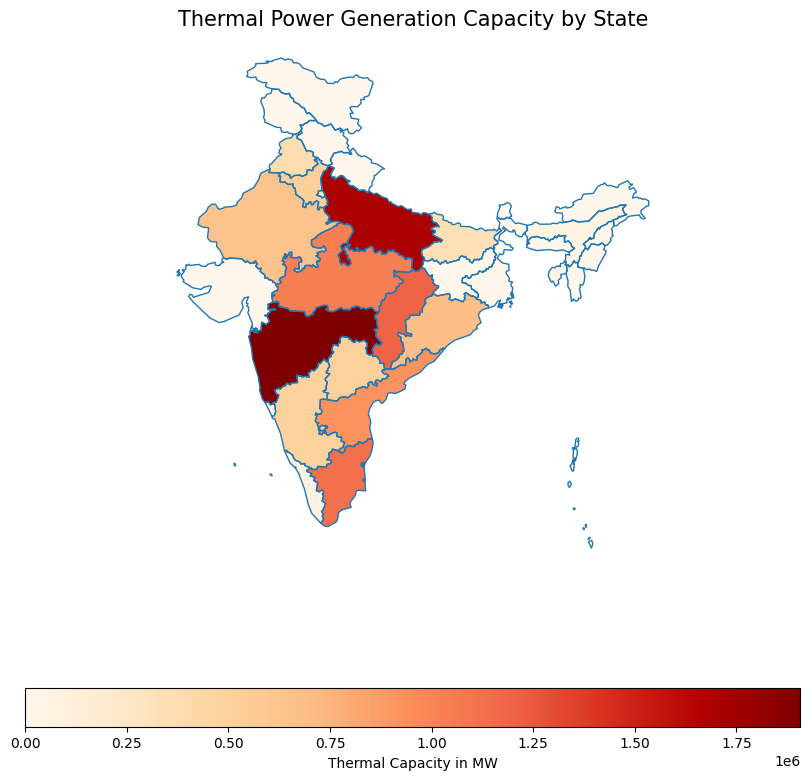

In [50]:
# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot the base map
merged_df.boundary.plot(ax=ax, linewidth=1)

merged_df.plot(column='THERMAL', ax=ax, legend=True,legend_kwds={'label': "Thermal Capacity in MW",'orientation': "horizontal"},cmap='OrRd')

ax.set_title('Thermal Power Generation Capacity by State', fontsize=15)
ax.set_axis_off()

plt.show()


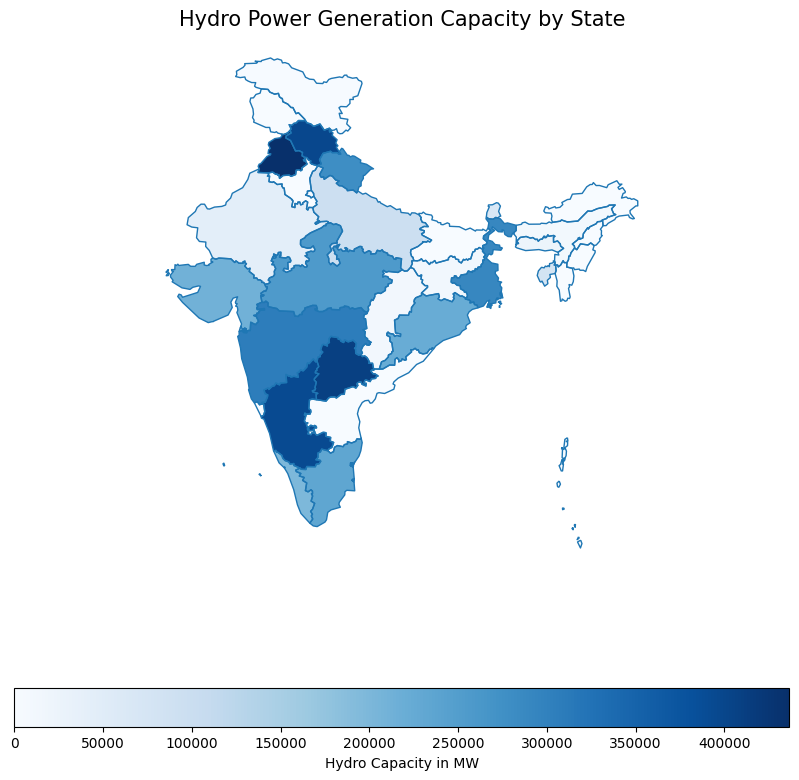

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_df.boundary.plot(ax=ax, linewidth=1)
merged_df.plot(column='HYDRO', ax=ax, legend=True, legend_kwds={'label': "Hydro Capacity in MW",'orientation': "horizontal"},cmap='Blues')

ax.set_title('Hydro Power Generation Capacity by State', fontsize=15)
ax.set_axis_off()

plt.show()


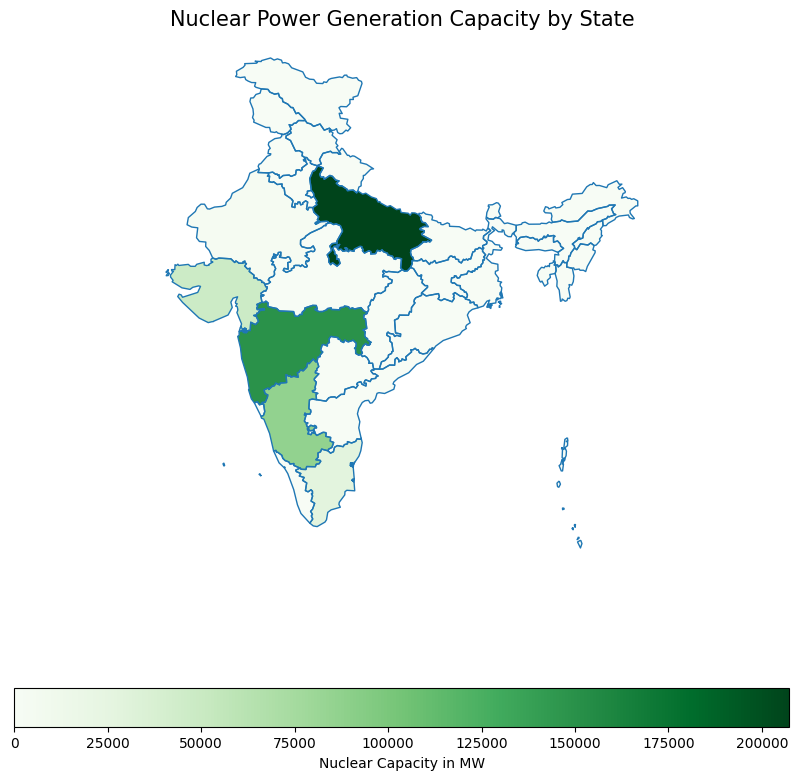

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_df.boundary.plot(ax=ax, linewidth=1)
merged_df.plot(column='NUCLEAR', ax=ax, legend=True,legend_kwds={'label': "Nuclear Capacity in MW",'orientation': "horizontal"},cmap='Greens')

ax.set_title('Nuclear Power Generation Capacity by State', fontsize=15)
ax.set_axis_off()

plt.show()

Overall Generation by Type

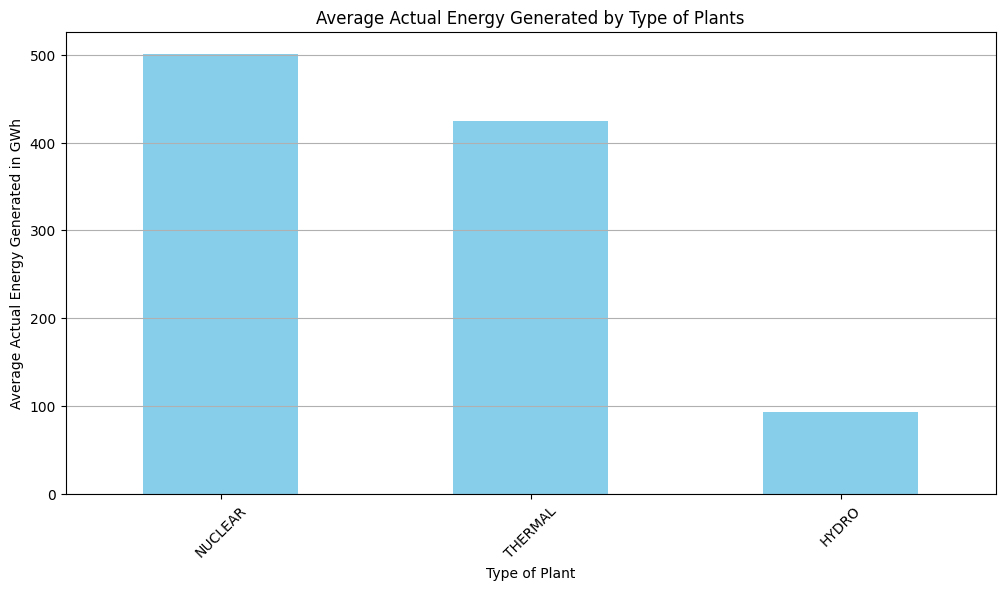

In [5]:
Energy_By_Type = Power_Generation.groupby('Category of Plant')['Actual energy generated'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
Energy_By_Type.plot(kind='bar', color='skyblue')
plt.title('Average Actual Energy Generated by Type of Plants')
plt.xlabel('Type of Plant')
plt.ylabel('Average Actual Energy Generated in GWh')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Ownership of Capacity

In [75]:
ownership = {}

# Iterate over each row in Power_Generation DataFrame
for index, row in Power_Generation.iterrows():
    sector = row['Sector of power plant']
    capacity_type = row['Category of Plant']
    capacity_value=row['Installed Capacity']

    # Initialize the dictionary for the state if not already present
    if sector not in ownership:
        ownership[sector] = {}

    # Initialize the list for the capacity type if not already present
    if capacity_type not in ownership[sector]:
        ownership[sector][capacity_type] = 0

    ownership[sector][capacity_type] += capacity_value

print(ownership)


{'PRIVATE IPP': {'THERMAL': 2629439.497999999, 'HYDRO': 145763.0}, 'STATE': {'HYDRO': 2656362.650000011, 'THERMAL': 6102265.739999985}, 'CENTRAL': {'THERMAL': nan, 'HYDRO': 1361655.85, 'NUCLEAR': 522080.0}, 'PRIVATE': {'THERMAL': 336143.0, 'HYDRO': 39018.0}, 'PVT': {'THERMAL': nan, 'HYDRO': 56724.0}}


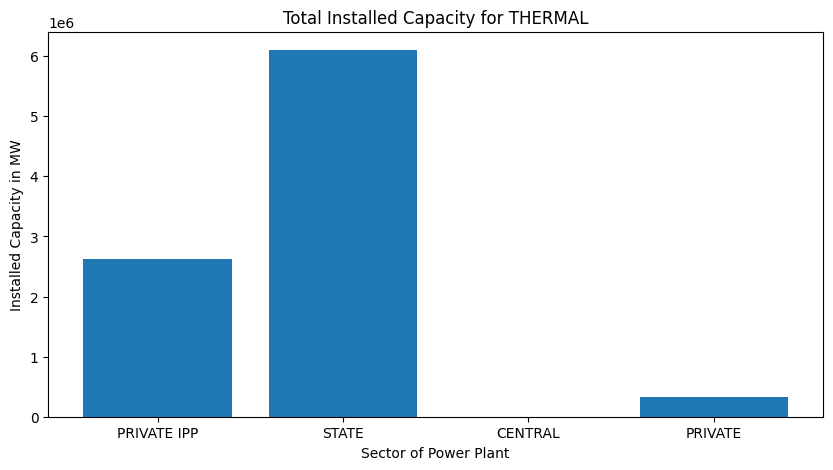

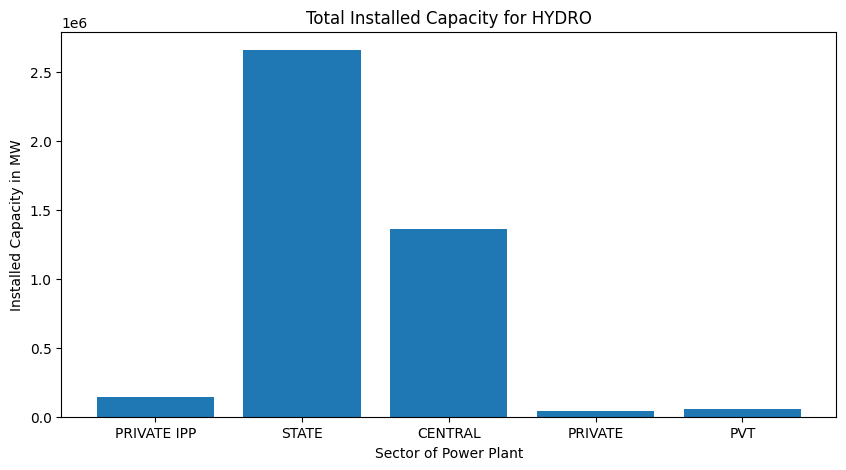

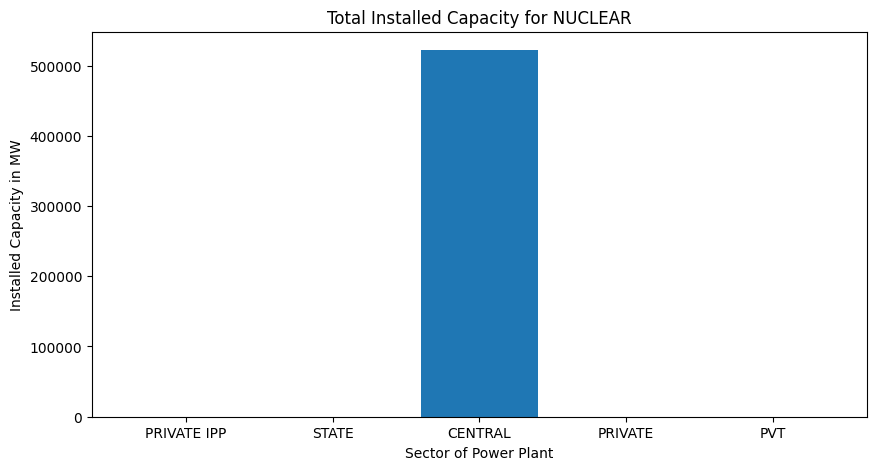

In [82]:
categories = set(cat for capacities in ownership.values() for cat in capacities)
category_data = {category: {sector: 0 for sector in ownership} for category in categories}

for sector, capacities in ownership.items():
    for category, capacity in capacities.items():
        category_data[category][sector] = capacity

# Plot the data
for category, capacities in category_data.items():
    names = list(capacities.keys())
    values = list(capacities.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values)
    plt.xlabel('Sector of Power Plant')
    plt.ylabel('Installed Capacity in MW')
    plt.title(f'Total Installed Capacity for {category}')
    plt.show()


Generation Programme Versus Actual Energy Generated by Type and state, are the plants efficient?

In [68]:
states_generation_by_type_vs_GEA = {}

# Iterate over each row in Power_Generation DataFrame
for index, row in Power_Generation.iterrows():
    state = row['State']
    capacity_type = row['Category of Plant']
    generation_value = row['Actual energy generated']
    cea_value = row['Generation Programme is prepared by CEA']

    # Initialize the dictionary for the state if not already present
    if state not in states_generation_by_type_vs_GEA:
        states_generation_by_type_vs_GEA[state] = {}

    # Initialize the list for the capacity type if not already present
    if capacity_type not in states_generation_by_type_vs_GEA[state]:
        states_generation_by_type_vs_GEA[state][capacity_type] = [0, 0]

    # Aggregate the values
    states_generation_by_type_vs_GEA[state][capacity_type][0] += generation_value
    if not pd.isna(cea_value):
        states_generation_by_type_vs_GEA[state][capacity_type][1] += cea_value

# Printing the result
print(states_generation_by_type_vs_GEA)


{'Chhattisgarh': {'THERMAL': [887185.7999999995, 578549.53], 'HYDRO': [2900.0799999999995, 2360.0]}, 'Himachal Pradesh': {'HYDRO': [185648.94, 135202.76]}, 'Maharashtra': {'THERMAL': [1279527.7199999988, 769239.6199999996], 'HYDRO': [108284.07000000015, 48405.60999999999], 'NUCLEAR': [120892.59999999999, 72528.0]}, 'Uttar Pradesh': {'THERMAL': [1458439.0400000007, 886777.25], 'HYDRO': [40115.33000000001, 26097.98], 'NUCLEAR': [146134.61999999997, 103441.0]}, 'Jammu Kashmir': {'HYDRO': [194112.06999999995, 108662.09], 'THERMAL': [29.09, 0.0]}, 'Bihar': {'THERMAL': [205118.75, 156626.00000000006]}, 'Rajasthan': {'THERMAL': [404135.85000000003, 319131.1799999999], 'HYDRO': [10864.349999999997, 6070.020000000001], 'NUCLEAR': [0.0, 0.0]}, 'Tamil Nadu': {'HYDRO': [81277.92000000011, 42998.41], 'NUCLEAR': [10122.510000000002, 24807.0], 'THERMAL': [855251.5699999997, 478745.0]}, 'Madhya Pradesh': {'THERMAL': [794551.1700000002, 493748.0], 'HYDRO': [77794.05000000006, 52493.01000000001]}, 'Assa

In [69]:
aggregated_data_cea_vs_gen = []

# Iterate over the dictionary and append to aggregated_data
for state, capacities in states_generation_by_type_vs_GEA.items():
    for capacity_type, value in capacities.items():
        aggregated_data_cea_vs_gen.append([state, capacity_type, value[0], value[1]])

# Create DataFrame from aggregated_data
aggregated_df_cea_vs_gen = pd.DataFrame(aggregated_data_cea_vs_gen, columns=['State', 'Type', 'Generated Power', 'CEA'])

# Pivot the DataFrame to have one row per state with capacity types as columns
aggregated_pivot_df_cea_vs_gen = aggregated_df.pivot_table(index='State', columns='Type', values=['Generated Power', 'CEA']).reset_index().fillna(0)

# Flatten the column index after pivot
aggregated_pivot_df_cea_vs_gen.columns = [col[1] if col[1] else col[0] for col in aggregated_pivot_df_cea_vs_gen.columns]

aggregated_pivot_df_cea_vs_gen.head()

,State,HYDRO,NUCLEAR,THERMAL,HYDRO,NUCLEAR,THERMAL
0,Andaman And Nicobar Islands,0.00,0.0,757.00,0.00,0.0,919.96
1,Andhra Pradesh,0.00,0.0,0.00,0.00,0.0,888534.65
2,Arunachal Pradesh,0.00,0.0,0.00,11963.00,0.0,0.00
3,Assam,3708.04,0.0,28910.68,4052.25,0.0,55341.73
4,Bihar,0.00,0.0,0.00,0.00,0.0,205080.57


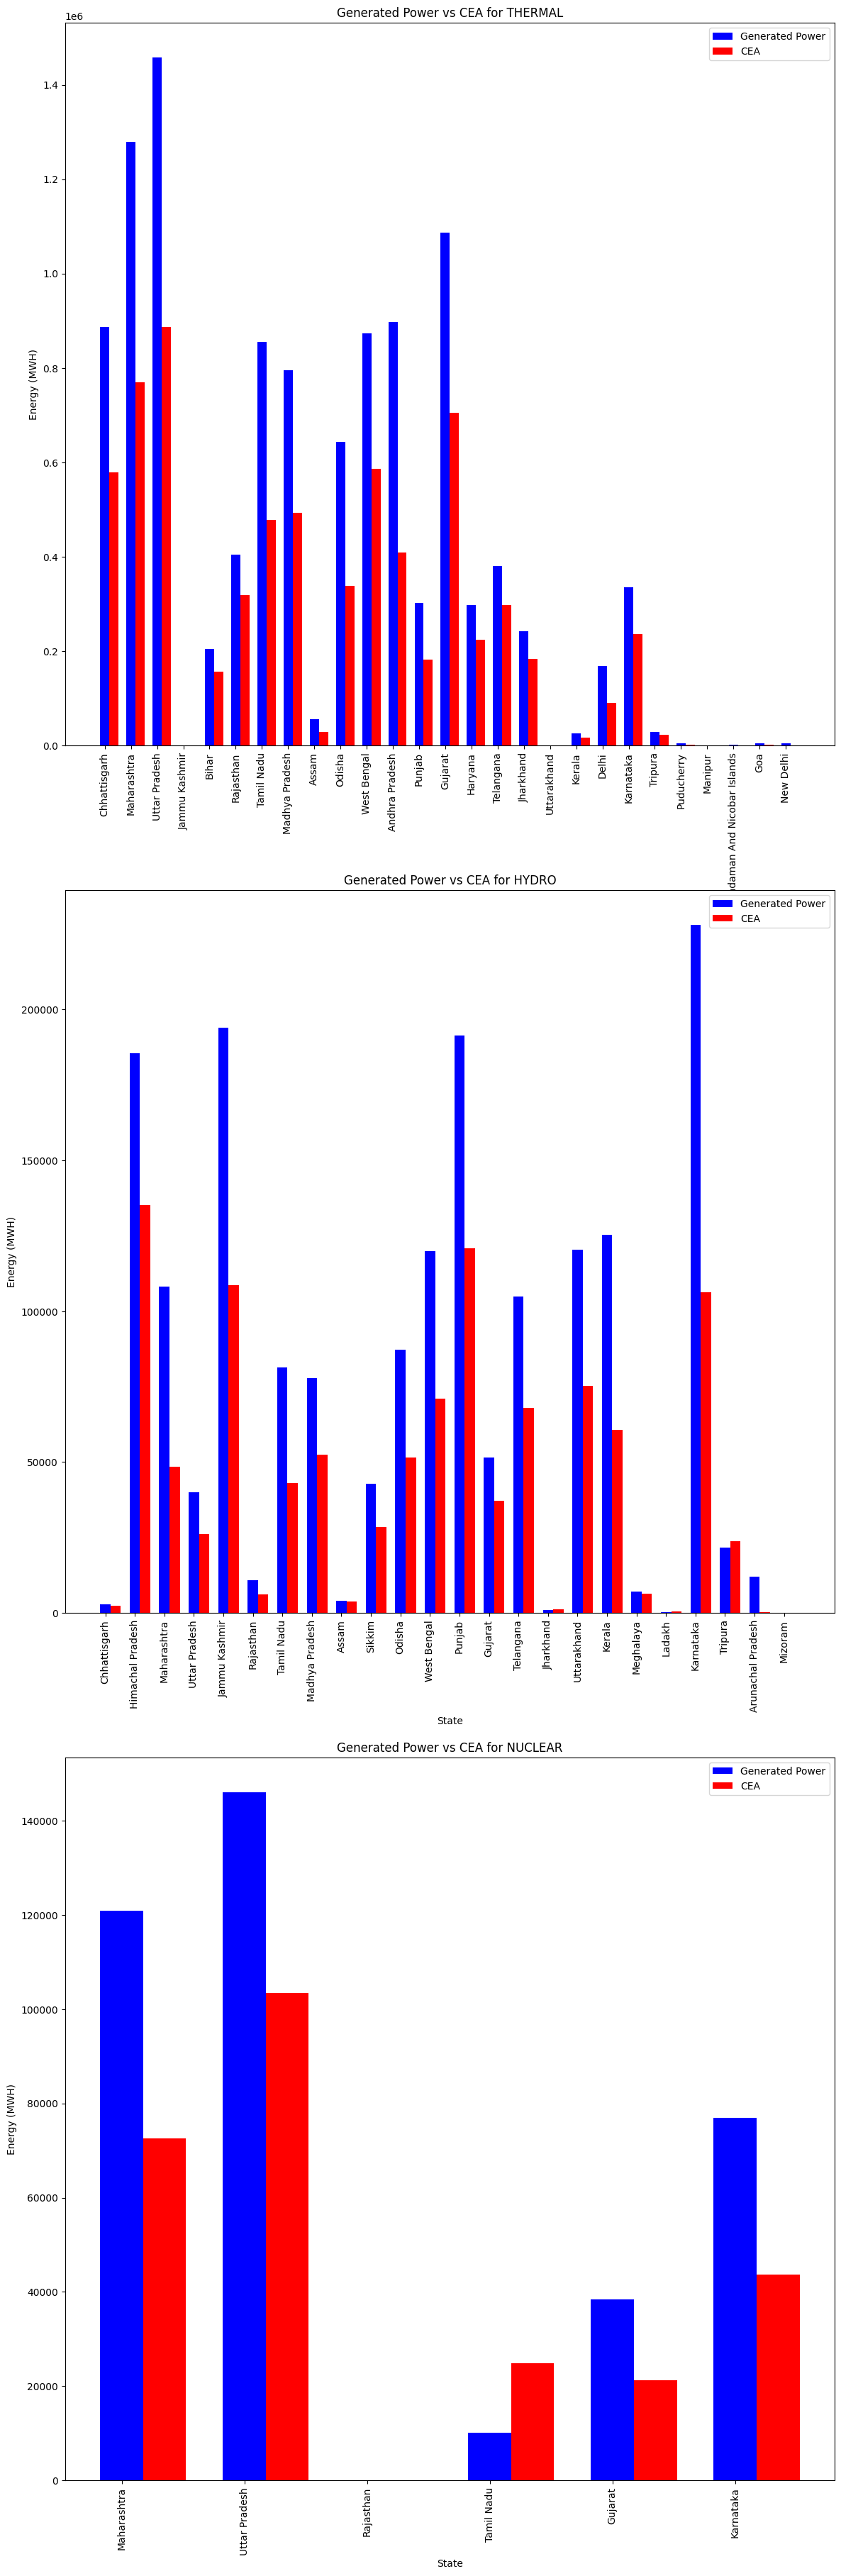

In [88]:
plt.figure(figsize=(14, 45))

# Iterate over unique energy types
energy_types = aggregated_df_cea_vs_gen['Type'].unique()
num_types = len(energy_types)

# Create subplots for each energy type
for idx, energy_type in enumerate(energy_types, start=1):
    plt.subplot(num_types, 1, idx)
    
    # Filter DataFrame for current energy type
    df_subset = aggregated_df_cea_vs_gen[aggregated_df_cea_vs_gen['Type'] == energy_type]
    
    # Plot bars for Generated Power and CEA for each state
    bar_width = 0.35
    states = df_subset['State']
    positions = range(len(states))
    
    plt.bar(positions, df_subset['Generated Power'], width=bar_width, label='Generated Power', color='b', align='center')
    plt.bar([p + bar_width for p in positions], df_subset['CEA'], width=bar_width, label='CEA', color='r', align='center')
    
    # Set labels and title
    plt.xlabel('State')
    plt.ylabel('Energy (MWH)')
    plt.title(f'Generated Power vs CEA for {energy_type}')
    plt.xticks(positions, states, rotation='vertical')
    plt.legend()

# Adjust layout and show plot
plt.show()

Analysis of Seasonal Trends in Energy

In [94]:
Season_Energy={}
for index,row in Power_Generation.iterrows():
    month=row['Month'][:-6]
    energy_gen=row['Actual energy generated']
    type_plant=row['Category of Plant']
    if month not in Season_Energy:
        Season_Energy[month]={}
    if type_plant not in Season_Energy[month]:
        Season_Energy[month][type_plant]=0
    Season_Energy[month][type_plant]+=energy_gen
print(Season_Energy)

{'April': {'THERMAL': 4925322.429999998, 'HYDRO': 819069.5100000005, 'NUCLEAR': 147712.79}, 'August': {'THERMAL': 529850.4600000001, 'HYDRO': 140180.96000000005, 'NUCLEAR': 22210.200000000004}, 'December': {'THERMAL': 610518.1800000002, 'HYDRO': 61813.67000000005, 'NUCLEAR': 21707.34}, 'February': {'THERMAL': 588429.0300000004, 'HYDRO': 63159.01000000001, 'NUCLEAR': 23423.399999999998}, 'January': {'THERMAL': 622708.2599999998, 'HYDRO': 61562.74999999992, 'NUCLEAR': 23644.69}, 'July': {'THERMAL': 547766.8199999998, 'HYDRO': 120035.41999999993, 'NUCLEAR': 21980.529999999995}, 'June': {'THERMAL': 557592.31, 'HYDRO': 102262.22000000006, 'NUCLEAR': 21487.94}, 'March': {'THERMAL': 551314.0800000004, 'HYDRO': 67157.42999999998, 'NUCLEAR': 22356.020000000004}, 'May': {'HYDRO': 95409.61999999998, 'THERMAL': 597714.4799999995, 'NUCLEAR': 21727.040000000005}, 'November': {'THERMAL': 575593.1199999999, 'HYDRO': 66654.73999999999, 'NUCLEAR': 22058.809999999998}, 'October': {'THERMAL': 596467.88, '

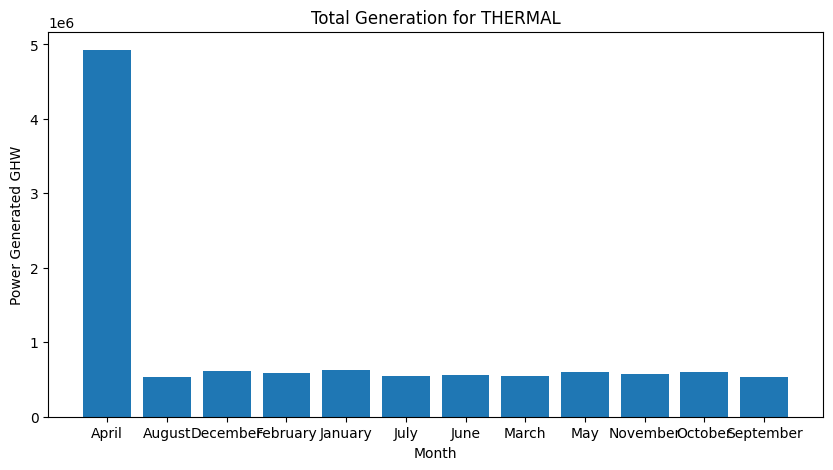

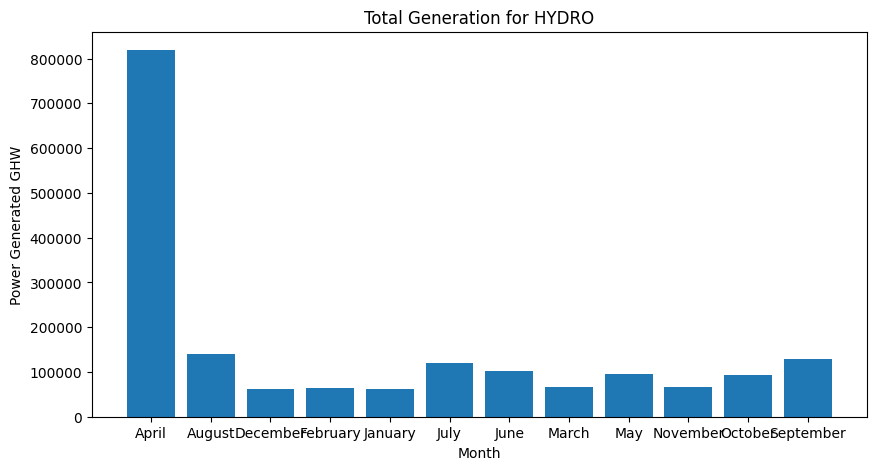

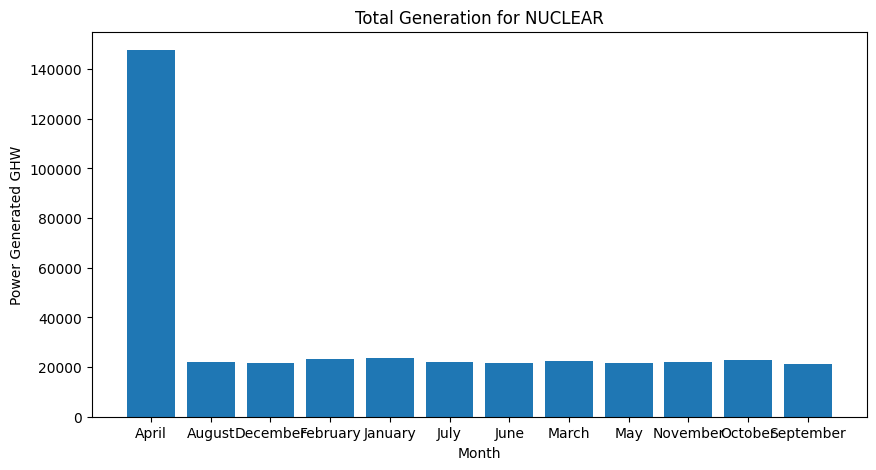

In [95]:
categories = set(cat for capacities in Season_Energy.values() for cat in capacities)
category_data = {category: {month: 0 for month in Season_Energy} for category in categories}

for sector, capacities in Season_Energy.items():
    for category, capacity in capacities.items():
        category_data[category][sector] = capacity

# Plot the data
for category, capacities in category_data.items():
    names = list(capacities.keys())
    values = list(capacities.values())

    plt.figure(figsize=(10, 5))
    plt.bar(names, values)
    plt.xlabel('Month')
    plt.ylabel('Power Generated GHW')
    plt.title(f'Total Generation for {category}')
    plt.show()


Fuel vs. Energy, What Fuel do we Use

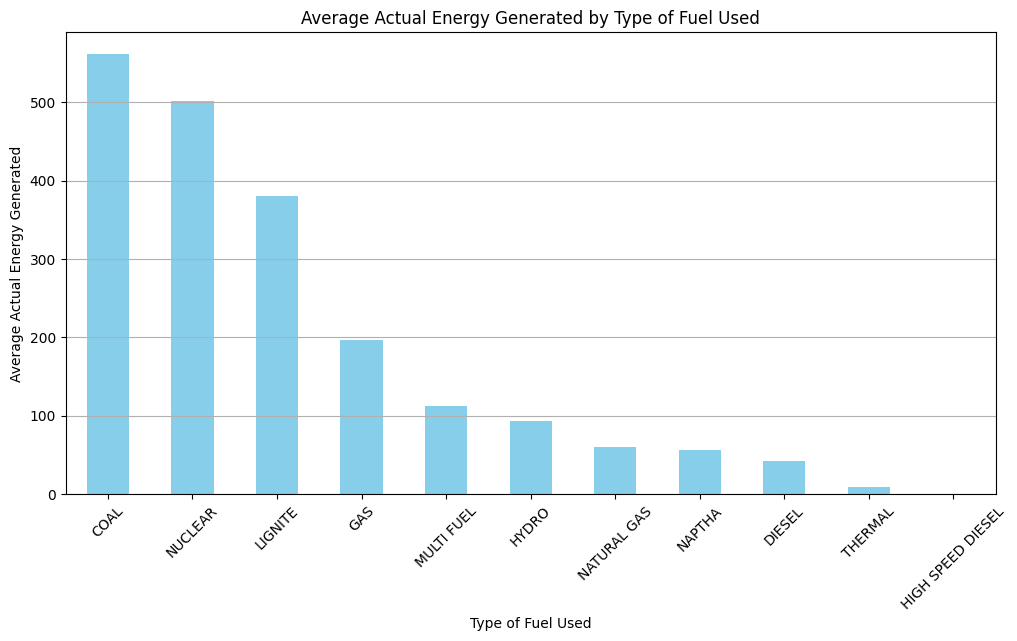

In [96]:
fuel_energy = Power_Generation.groupby('Type of fuel used')['Actual energy generated'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
fuel_energy.plot(kind='bar', color='skyblue')
plt.title('Average Actual Energy Generated by Type of Fuel Used')
plt.xlabel('Type of Fuel Used')
plt.ylabel('Average Actual Energy Generated')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Region Wise Average Energy

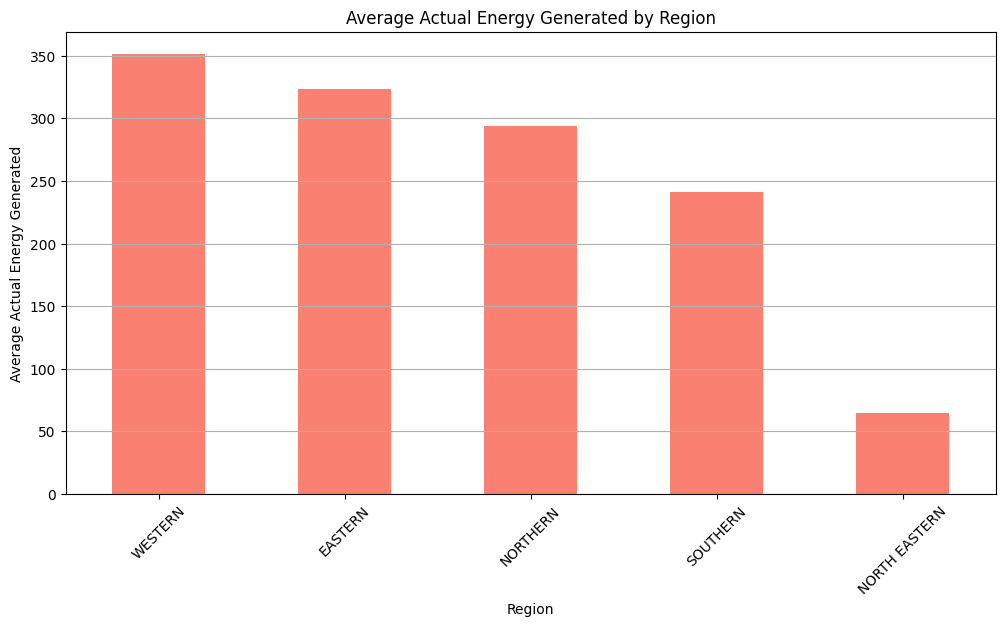

In [97]:
region_energy = Power_Generation.groupby('Region')['Actual energy generated'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
region_energy.plot(kind='bar', color='salmon')
plt.title('Average Actual Energy Generated by Region')
plt.xlabel('Region')
plt.ylabel('Average Actual Energy Generated')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Top 10 Coal Companies

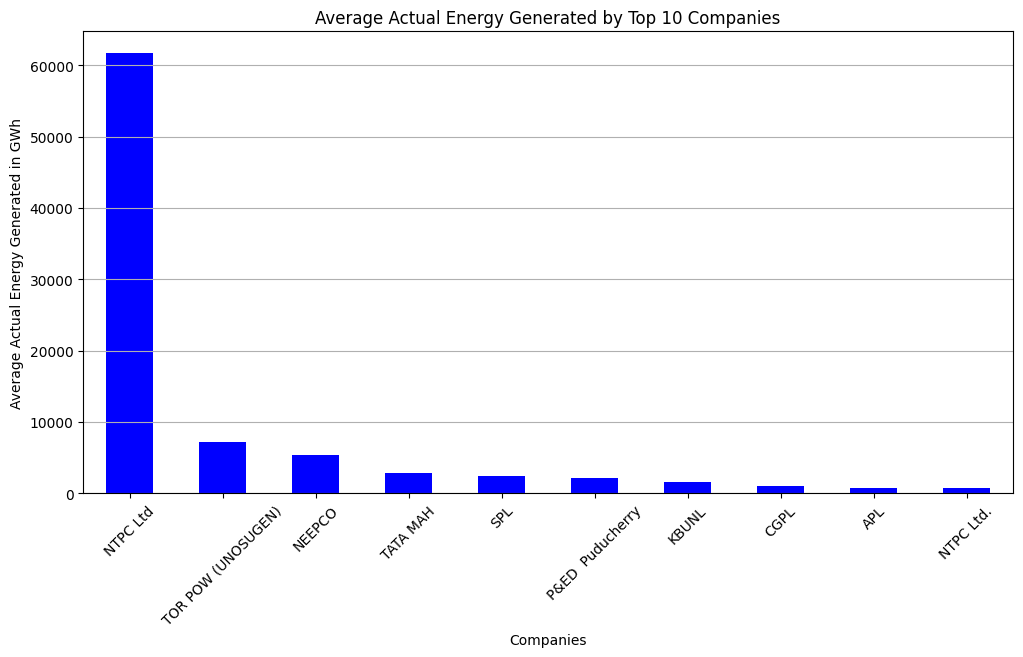

In [7]:
coal_company = Power_Generation.groupby('Name of coal company')['Actual energy generated'].mean().sort_values(ascending=False)

# Take the top 5 companies
top_5_companies = coal_company.head(10)

# Plot the result
plt.figure(figsize=(12, 6))
top_5_companies.plot(kind='bar', color='blue')
plt.title('Average Actual Energy Generated by Top 10 Companies')
plt.xlabel('Companies')
plt.ylabel('Average Actual Energy Generated in GWh')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Most Efficient State in generation

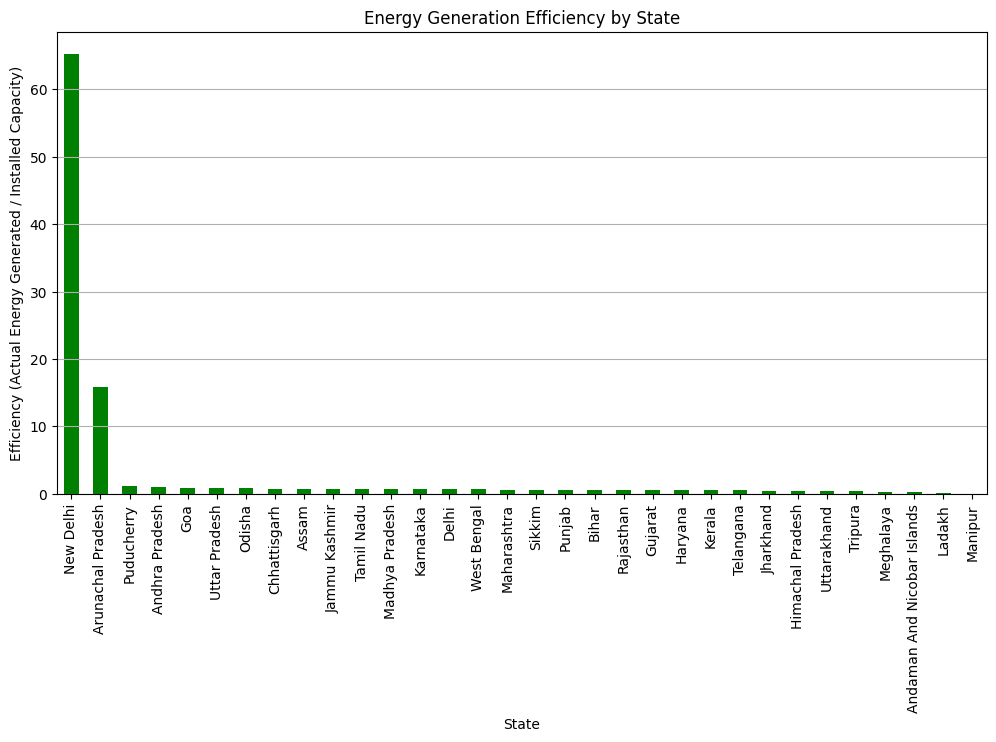

In [17]:
Power_State = Power_Generation.groupby('State')['Actual energy generated'].sum()
Capacity_State = Power_Generation.groupby('State')['Installed Capacity'].sum()

# Calculate Efficiency for each state
Efficiency_State = Power_State / Capacity_State

# Filter out any states where Installed Capacity is zero to avoid division by zero
Efficiency_State = Efficiency_State[Capacity_State > 0]

# Sort efficiency for better visualization
Efficiency_State = Efficiency_State.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
Efficiency_State.plot(kind='bar', color='green')
plt.title('Energy Generation Efficiency by State')
plt.xlabel('State')
plt.ylabel('Efficiency (Actual Energy Generated / Installed Capacity)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


Efficiency by type of Power

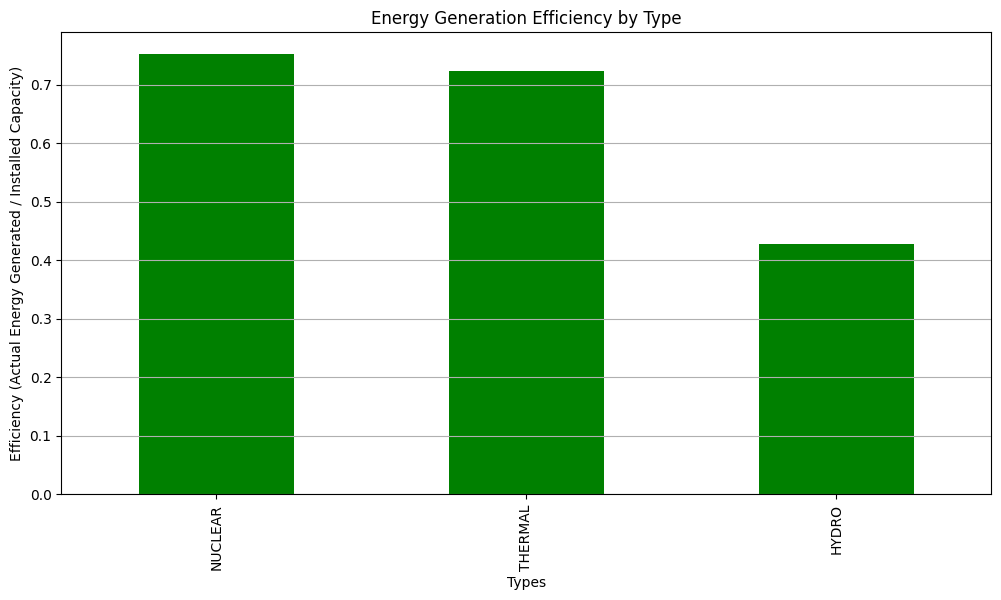

In [22]:
Power_type = Power_Generation.groupby('Category of Plant')['Actual energy generated'].sum()
Capacity_type = Power_Generation.groupby('Category of Plant')['Installed Capacity'].sum()

# Calculate Efficiency for each type
Efficiency = Power_type / Capacity_type

# Filter out any types where Installed Capacity is zero to avoid division by zero
Efficiency = Efficiency[Capacity_type > 0]

# Sort efficiency for better visualization
Efficiency = Efficiency.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(12, 6))
Efficiency.plot(kind='bar', color='green')
plt.title('Energy Generation Efficiency by Type')
plt.xlabel('Types')
plt.ylabel('Efficiency (Actual Energy Generated / Installed Capacity)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
